In [16]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
def f(x):
    return 3*x**2-4*x+5

In [27]:
print(f(0))
print(f(-1))
print(f(1))

5
12
4


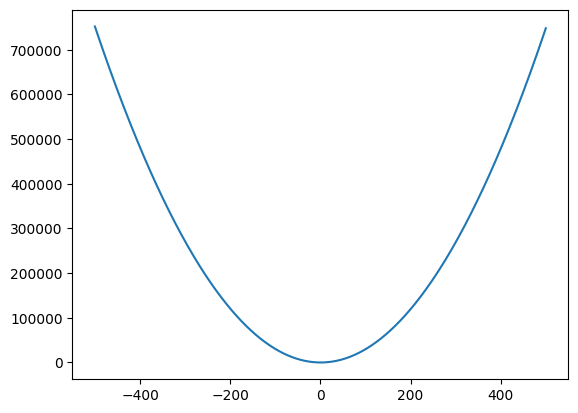

In [26]:
xs=np.arange(-500,500.1,0.25)
ys=f(xs)
plt.plot(xs,ys)

In [28]:
a=2
b=-3
c=10
d=a*b+c
print(d)

4


In [29]:
h=0.001
a=2
b=-3
c=10

d1=a*b+c
c+=h
d2=a*b+c

print('d1',d1)
print('d2',d2)
print('slope',(d2-d1)/h)

d1 4
d2 4.0009999999999994
slope 0.9999999999994458


In [38]:
class Value:
    def __init__(self,data,_children=(),_op='',label=''):
        self.data=data
        self._prev=set(_children)
        self._op=_op
        self.label=label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self,other):
        out = Value(self.data+other.data,(self,other),'+')
        return out

    def __mul__(self,other):
        out = Value(self.data*other.data,(self,other),'*')
        return out

a=Value(2.0,label='a')
b=Value(-3.0,label='b')
c=Value(10,label='c')
e=a*b;e.label='e'
d=e+c;d.label='d'
f=Value(-2.0, label='f')
L=d*f;L.label='l'
L

Value(data=-8.0)

In [40]:
from graphviz import Digraph

def trace(root):
    nodes,edges=set(),set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes,edges
                
def draw_dot(root, format='svg', rankdir='LR'):

    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s  | data %.4f }" % (n.label, n.data), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot



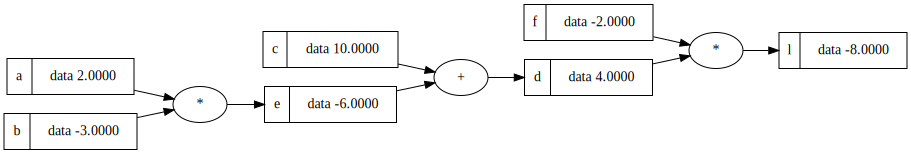

In [41]:
draw_dot(L)